MAIN EXPERIMENTAL CODE -- STARS POSITION 

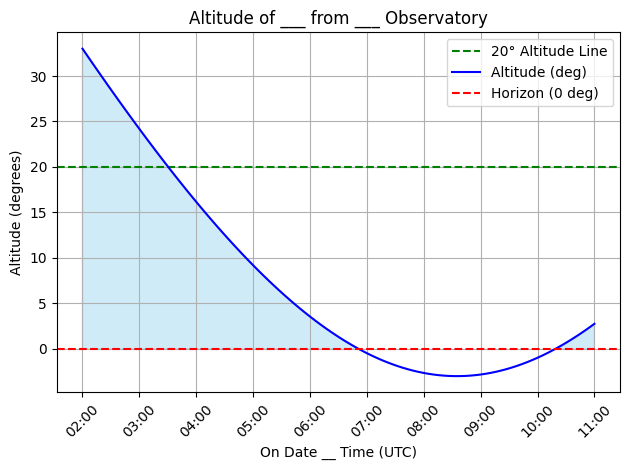

1 hours and 27 minutes to view the object


In [28]:
# ensure that astroplan and astropy are already downloaded in python/notebook

from astroplan import Observer, FixedTarget
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import EarthLocation, Latitude, Longitude
import matplotlib.pyplot as plt
import numpy as np

# Define your observer location 
# you can rename the observatory name accordingly
utah_observatory = Observer(latitude=37.73*u.deg, longitude=-113.6975*u.deg, elevation=1570*u.m, name="XYZ Observatory")

# u.deg ensures that the compiler interprets the values in degree units

# Define your target coordinates
# For most celestial objects within the solar system, their coordinates can be found on a JPL horizons database
# For objects outside our solar system, refer to the SIMBAD database

# targer_coords are set in the format 'RA' , 'DEC' where both are written in hours minutes and seconds. A sample one has been done
target_coords = SkyCoord('19h40m40.22s', '49d12m09.64s') 

# Fix the target and its coordinates. This indicates that the object is relatively still in frame 
# with relation to other stars in its background

celestial_object = FixedTarget(name="Star_Name", coord=target_coords)


# Define your observing time range
# CAUTION!! The time and dates you input MUST be in UTC. If unsure, make the conversion online!
# NOTE! When marking the time above, ensure you have successfully found out the local astronomical twilight time of your region
# (For info above, see code on finding Astronomical twilight in the same repo)

# sample below

start_time = Time('2024-12-31 02:00:00')  # Start time
end_time = Time('2024-12-31 11:00:00')  # End time


# Creating an array of times with units 
# this is done to avoid creating any errors since date.time objects are a little weird for handling

delta_time = (end_time - start_time).to(u.hour).value  # Convert time delta to hours

time_steps = np.linspace(0, delta_time, 100)  # Create time steps in hours 

time_range = start_time + time_steps * u.hour  # Apply the time steps to start time

# Now calculate the altitude for each time in the time range

# you might have to change the name for the .altaz function depending on the variable name of your observatory!

altitudes = utah_observatory.altaz(time_range, celestial_object).alt 
altitudes_deg = altitudes.to_value(u.deg) # this step is done to avoid a token error and to strip the units off of the altitude

# You may change the value of this line according to your telescopes capability of observing altitudes.
# For ex., if your telescope can view a minimum altitude of 10°, you may write 
# plt.axhline(10, color = 'green' , linestyle = '--' , label = "10° altitude line")

plt.axhline(20, color='green', linestyle='--', label="20° Altitude Line") # creating a threshold line for the min altitude

# importing this library and object is important to get a robust and clean x-axis label
import matplotlib.dates as mdates

# Plot altitude vs. time
plt.plot(time_range.datetime, altitudes_deg, label="Altitude (deg)", color="blue")
plt.fill_between(time_range.datetime, 0, altitudes_deg, where=(altitudes_deg > 0), color='skyblue', alpha=0.4) # done for aesthetic

# Label the plot
plt.xlabel("On Date __ Time (UTC)")
plt.ylabel("Altitude (degrees)")
plt.title("Altitude of ___ from ___ Observatory")
plt.axhline(0, color='red', linestyle='--', label="Horizon (0 deg)")

plt.legend()

# the .gca() [get current axis] function compiled with the major formatter helps the x-axis show only hourly time without the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Format as hours and minutes only

# Set these ticks at hourly intervals (you can adjust this as needed)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

plt.xticks(rotation=45)  # Rotate for readability
plt.grid(True)

# to avoid element overlap, we can add
plt.tight_layout()
plt.show()

# This next part is just for the code to give you a realistic numerical value for the amount of time you can view the object

# the number value may change according to your minimum altitude once again
above_20_deg = altitudes > 20 * u.deg

# Calculate total time the object spends above xyz degrees

time_above_20 = time_steps[above_20_deg]  # Get the time steps for which altitude is above xyz degrees


# Calculate the total duration
duration_above_20 = time_above_20[-1] - time_above_20[0]  # Time spent above 20 degrees

# Convert the duration to hours and minutes
hours = int(duration_above_20)  # Get the integer part for hours
minutes = int((duration_above_20 - hours) * 60)  # Convert the fractional part to minutes

# Print the result in hours and minutes
print(f"{hours} hours and {minutes} minutes to view the object")



